In [74]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [75]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [76]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [77]:
class_names = ["T-shirt / Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

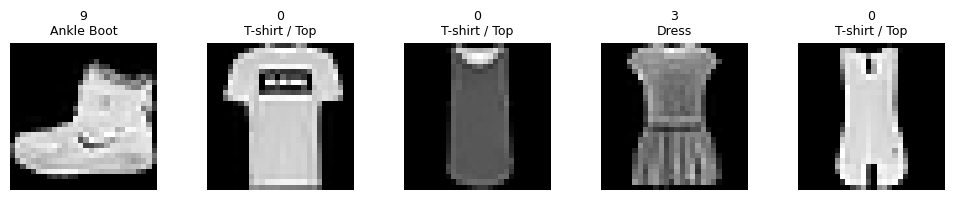

In [78]:
#show first five images
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"{y_train[i]}\n{class_names[y_train[i]]}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [79]:
X_train = (X_train.astype('float32') / 255.0)[..., None]
X_test = (X_test.astype('float32') / 255.0)[..., None]

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [80]:
# Shuffle before making validation split (recommended)
rng = np.random.default_rng(42)
idx = rng.permutation(len(X_train))
rng, idx

(Generator(PCG64) at 0x3A2607140,
 array([ 3493, 57546,  8815, ...,  5668, 22113,  9864]))

In [81]:
# Shuffling
X_train = X_train[idx]
y_train = y_train[idx]

In [82]:
val_size = 6000
X_val = X_train[:val_size]
y_val = y_train[:val_size]

X_tr = X_train[val_size:]
y_tr = y_train[val_size:]

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

wd = keras.regularizers.l2(1e-4)

augment = keras.Sequential([
    layers.RandomTranslation(0.10, 0.10),
    layers.RandomRotation(0.08),
    layers.RandomZoom(0.12),
    layers.RandomContrast(0.12),
], name="augment")

model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    augment,

    layers.Conv2D(32, 3, padding="same", kernel_regularizer=wd),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(32, 3, padding="same", kernel_regularizer=wd),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding="same", kernel_regularizer=wd),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(64, 3, padding="same", kernel_regularizer=wd),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, kernel_regularizer=wd),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.40),

    layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(learning_rate=0.05, momentum=0.9, nesterov=True)

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()
print("Optimizer:", type(model.optimizer).__name__, "LR:", float(keras.backend.get_value(model.optimizer.learning_rate)))

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augment (Sequential)            │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             

 Total params: 75,882 (296.41 KB)

 Trainable params: 75,242 (293.91 KB)

 Non-trainable params: 640 (2.50 KB)

Optimizer: SGD LR: 0.05000000074505806


In [84]:
callbacks = [
    keras.callbacks.ModelCheckpoint("fashion.best.keras", 
                                    monitor="val_accuracy",
                                    save_best_only=True,
                                    verbose=1),

    keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                  patience=3,
                                  restore_best_weights=True,
                                  verbose=1),
    
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                      factor=0.5,
                                      patience=1,
                                      min_lr=1e-5,
                                      verbose=1)
]

In [85]:
print("Training a NEW model object id:", id(model))
history = model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)
print("Still the same model object id:", id(model))

Training a NEW model object id: 15609156112
Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5950 - loss: 1.1254
Epoch 1: val_accuracy improved from None to 0.52300, saving model to fashion.best.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.6790 - loss: 0.8887 - val_accuracy: 0.5230 - val_loss: 1.2021 - learning_rate: 0.0500
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7608 - loss: 0.6764
Epoch 2: val_accuracy improved from 0.52300 to 0.78633, saving model to fashion.best.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.7678 - loss: 0.6587 - val_accuracy: 0.7863 - val_loss: 0.6054 - learning_rate: 0.0500
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7933 - loss: 0.6024
Epoch 3: val_accuracy improved from 0.78633 to 0.83217, saving model to fashion.best.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.7949 - loss: 0.5967 - val_accuracy: 0.8322 - val_loss: 0.5198 - learning_rate: 0.0

In [86]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy = ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8666 - loss: 0.4086
Test Accuracy =  0.866599977016449


In [87]:
probs = model.predict(X_test, verbose=1)
y_pred = np.argmax(probs, axis=1)

cm = tf.math.confusion_matrix(y_test, y_pred, num_classes=10).numpy()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


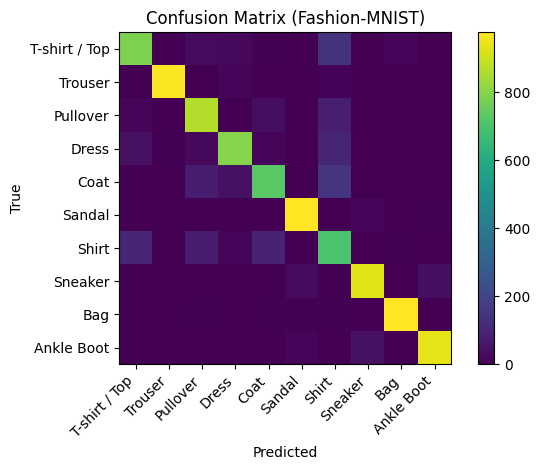

In [88]:
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix (Fashion-MNIST)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(10), class_names, rotation=45, ha="right")
plt.yticks(range(10), class_names)
plt.colorbar()
plt.tight_layout()
plt.show()

In [89]:
cm_off = cm.copy()
np.fill_diagonal(cm_off, 0)
pairs = np.dstack(np.unravel_index(np.argsort(cm_off.ravel())[::-1], cm_off.shape))[0]

print("\nTop confusions (true -> pred : count)")
for i in range(10):
    t, p = pairs[i]
    print(f"{t}({class_names[t]}) -> {p}({class_names[p]}) : {cm[t, p]}")


Top confusions (true -> pred : count)
4(Coat) -> 6(Shirt) : 146
0(T-shirt / Top) -> 6(Shirt) : 145
6(Shirt) -> 0(T-shirt / Top) : 105
3(Dress) -> 6(Shirt) : 100
6(Shirt) -> 4(Coat) : 95
2(Pullover) -> 6(Shirt) : 82
6(Shirt) -> 2(Pullover) : 77
4(Coat) -> 2(Pullover) : 77
9(Ankle Boot) -> 7(Sneaker) : 45
4(Coat) -> 3(Dress) : 45


In [90]:
wrong_idx = np.where(y_pred != y_test)[0]
wrong_conf = probs[wrong_idx, y_pred[wrong_idx]]
top = wrong_idx[np.argsort(wrong_idx)[::-1]]

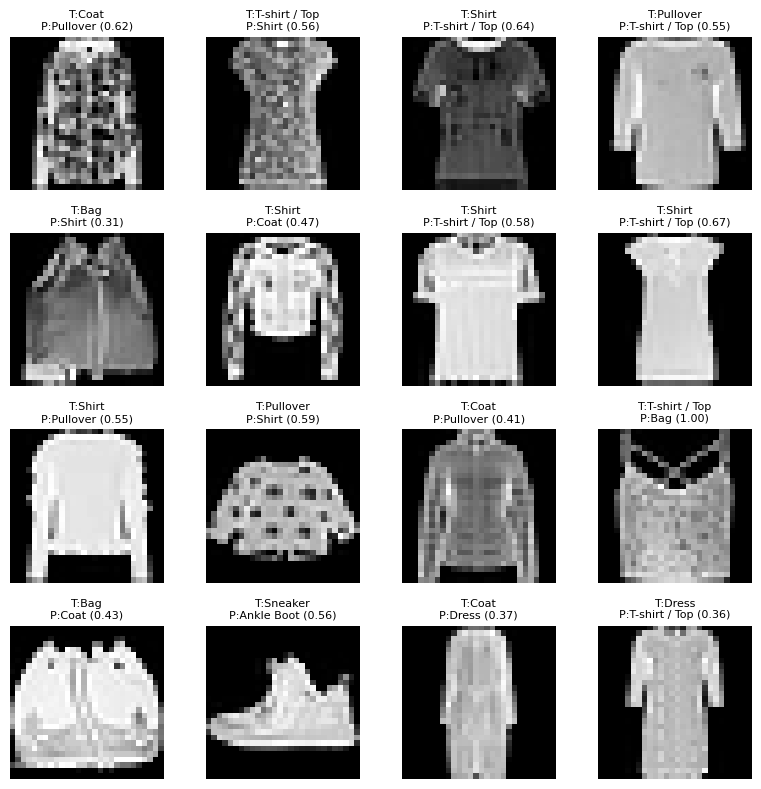

In [91]:
n = min(16, len(top))
plt.figure(figsize=(8, 8))
for i in range(n):
    idx = top[i]
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[idx].squeeze(), cmap="gray")
    plt.axis("off")
    true_name = class_names[y_test[idx]]
    pred_name = class_names[y_pred[idx]]
    conf = probs[idx, y_pred[idx]]
    plt.title(f"T:{true_name}\nP:{pred_name} ({conf:.2f})", fontsize=8)
plt.tight_layout()
plt.show()

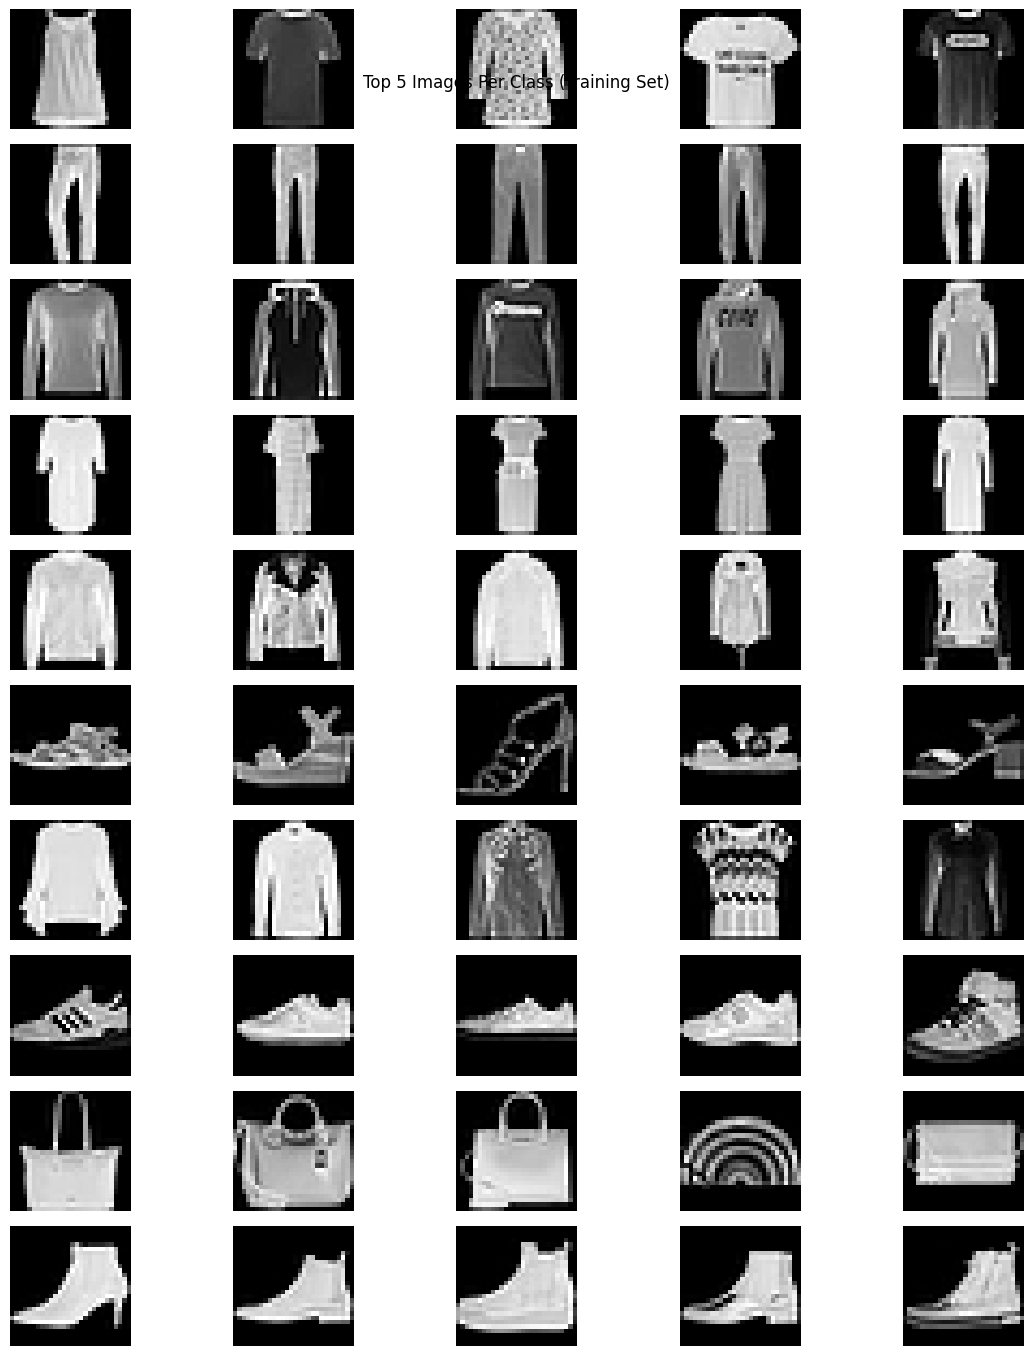

In [92]:
import numpy as np
import matplotlib.pyplot as plt

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def show_top5_per_class(x, y, class_names):
    plt.figure(figsize=(12, 14))
    for c in range(10):
        idx = np.where(y == c)[0][:5]  # first 5 occurrences of class c
        for j, i in enumerate(idx):
            plt.subplot(10, 5, c * 5 + j + 1)
            plt.imshow(x[i], cmap="gray")
            if j == 0:
                plt.ylabel(f"{c}: {class_names[c]}", rotation=0, labelpad=55, fontsize=10)
            plt.axis("off")
    plt.suptitle("Top 5 Images Per Class (Training Set)", y=0.92)
    plt.tight_layout()
    plt.show()

# Use this right after loading (before normalization is fine too)
show_top5_per_class(X_train, y_train, class_names)

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def show_top5_misclassified(x_test, y_test, probs, class_names):
    y_pred = np.argmax(probs, axis=1)

    wrong_idx = np.where(y_pred != y_test)[0]
    if len(wrong_idx) == 0:
        print("No misclassifications found 🎉")
        return

    # confidence of the predicted (wrong) class for each wrong sample
    wrong_conf = probs[wrong_idx, y_pred[wrong_idx]]

    # sort wrong samples by confidence, high -> low
    top_wrong = wrong_idx[np.argsort(wrong_conf)[::-1]][:5]

    plt.figure(figsize=(12, 3))
    for k, idx in enumerate(top_wrong):
        plt.subplot(1, 5, k + 1)
        plt.imshow(x_test[idx].squeeze(), cmap="gray")
        true_name = class_names[y_test[idx]]
        pred_name = class_names[y_pred[idx]]
        conf = probs[idx, y_pred[idx]]
        plt.title(f"T:{true_name}\nP:{pred_name}\n{conf:.2f}", fontsize=9)
        plt.axis("off")

    plt.suptitle("Top 5 Most Confident Misclassifications", y=1.05)
    plt.tight_layout()
    plt.show()

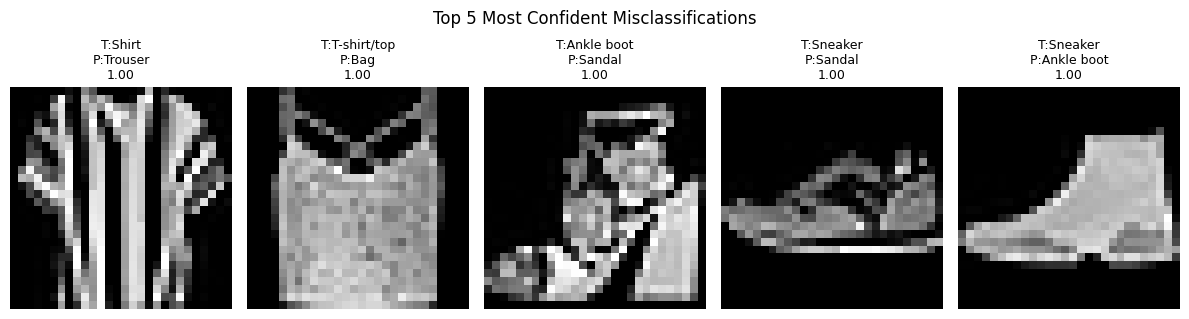

In [94]:
probs = model.predict(X_test, verbose=0)
show_top5_misclassified(X_test, y_test, probs, class_names)